### Bibliotecas

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px


In [111]:
!pip install sidrapy
import sidrapy

In [112]:
!pip install shapely
!pip install pyproj
!pip install packaging
!pip install fiona

In [113]:
import shapely
import pyproj
import packaging
import fiona

In [114]:
!pip install geopandas
import geopandas as gpd

### Dados da anp Bahia 2004 - 2022

Dados originais: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Dados retirados do https://basedosdados.org/dataset/br-anp-precos-combustiveis?bdm_table=microdados

In [115]:
bahia = pd.read_csv('C:/Users/phill/Desktop/Trab/gasolina/bahia.csv',sep=',')

display(bahia.head(2))
display(bahia.tail(2))


,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda
0,2021,BA,2927408,PITUBA,41810-012,"AVENIDA PROFESSOR MAGALHAES NETO,1304 POSTO LO...",31.219.518/0001-44,F A MARTINS DERIVADOS DE PETROLEO LTDA,RAIZEN,2021-05-31,gasolina aditivada,R$/litro,NaN,6.289
1,2021,BA,2930709,BA 093,43700-000,"RUA OITEIRO,164 FAZENDA SANTA ROSA KM 02, SENT...",14.965.502/0001-61,LCL COMÉRCIO DE COMBUSTÍVEIS E SERVIÇOS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2021-06-01,gasolina aditivada,R$/litro,NaN,5.879


,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda
1292237,2018,BA,2924009,CENTRO,48601-320,"RUA JOSÉ HEMETERIO DE CARVALHO,S/N",01.766.034/0002-35,COMERCIAL DE COMBUSTIVEIS E TRANSPORTADORA OAS...,RAIZEN,2018-04-25,diesel s10,R$/litro,NaN,3.570
1292238,2019,BA,2931350,JARDIM LIBERDADE,45998-560,"AVENIDA PRESIDENTE GETULIO VARGAS,6247",12.125.475/0001-93,POSTO SEGURO II - DERIVADOS DE PETROLEO LTDA.,BRANCA,2019-03-05,diesel s10,R$/litro,NaN,3.649


In [116]:
bahia.set_index('id_municipio').head(1) 

,ano,sigla_uf,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda
id_municipio,,,,,,,,,,,,,
2927408,2021,BA,PITUBA,41810-012,"AVENIDA PROFESSOR MAGALHAES NETO,1304 POSTO LO...",31.219.518/0001-44,F A MARTINS DERIVADOS DE PETROLEO LTDA,RAIZEN,2021-05-31,gasolina aditivada,R$/litro,NaN,6.289


### Código dos munícipios do Brasil

In [117]:
id_municipio = pd.read_excel('C:/Users/phill/Desktop/Trab/gasolina/id_municipio.xls')
id_municipio.head()

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [118]:
id = id_municipio.iloc[:,11:13]
id.head(5)

,Código Município Completo,Nome_Município
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes


In [119]:
id = id.rename(columns={'Código Município Completo':'id_municipio','Nome_Município':'municipio'})
id

,id_municipio,municipio
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes
...,...,...
5565,5222005,Vianópolis
5566,5222054,Vicentinópolis
5567,5222203,Vila Boa
5568,5222302,Vila Propício


In [120]:
id = id.set_index('id_municipio')
id

,municipio
id_municipio,
1100015,Alta Floresta D'Oeste
1100379,Alto Alegre dos Parecis
1100403,Alto Paraíso
1100346,Alvorada D'Oeste
1100023,Ariquemes
...,...
5222005,Vianópolis
5222054,Vicentinópolis
5222203,Vila Boa


In [121]:
id[id['municipio'] == 'Ilhéus']

,municipio
id_municipio,
2913606,Ilhéus


### Juntando as duas tabelas

In [122]:
dados = pd.merge(bahia,id, on='id_municipio')
dados.head(5)


,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
0,2021,BA,2927408,PITUBA,41810-012,"AVENIDA PROFESSOR MAGALHAES NETO,1304 POSTO LO...",31.219.518/0001-44,F A MARTINS DERIVADOS DE PETROLEO LTDA,RAIZEN,2021-05-31,gasolina aditivada,R$/litro,NaN,6.289,Salvador
1,2021,BA,2927408,STELLA MARIS,41500-060,"RUA D - PARQUE STELLA MARIS,92 LOTES 05, 06 E 07",00.704.922/0001-80,ESTELLA MARIS DERIVADOS DE PETROLEO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2021-06-01,gasolina aditivada,R$/litro,NaN,5.990,Salvador
2,2021,BA,2927408,ARMACAO,41750-240,"AVENIDA OCTAVIO MANGABEIRA,5030",29.102.319/0001-00,POSTO JARDIM ARMACAO COMBUSTIVEIS LTDA. - EPP,PETROBRAS DISTRIBUIDORA S.A.,2021-05-31,gasolina aditivada,R$/litro,NaN,6.090,Salvador
3,2021,BA,2927408,CHAME-CHAME,40155-150,"AVENIDA CENTENARIO,2726",00.216.623/0001-04,WALTER TANNUS FREITAS,RAIZEN,2021-05-31,gasolina aditivada,R$/litro,NaN,6.190,Salvador
4,2021,BA,2927408,PERNAMBUES,41130-530,"AVENIDA LUIS VIANA,2489",15.151.046/0012-31,POSTO KALILANDIA LTDA,RAIZEN,2021-06-21,gasolina aditivada,R$/litro,NaN,6.190,Salvador


### Analisando os munícipios de Ilhéus-Itabuna

In [123]:
dados.head(1)

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
0,2021,BA,2927408,PITUBA,41810-012,"AVENIDA PROFESSOR MAGALHAES NETO,1304 POSTO LO...",31.219.518/0001-44,F A MARTINS DERIVADOS DE PETROLEO LTDA,RAIZEN,2021-05-31,gasolina aditivada,R$/litro,NaN,6.289,Salvador


In [124]:
dados.dtypes


ano                       int64
sigla_uf                 object
id_municipio              int64
bairro_revenda           object
cep_revenda              object
endereco_revenda         object
cnpj_revenda             object
nome_estabelecimento     object
bandeira_revenda         object
data_coleta              object
produto                  object
unidade_medida           object
preco_compra            float64
preco_venda             float64
municipio                object
dtype: object

In [125]:
ilheus = dados.query('municipio == "Ilhéus"')
itabuna = dados.query('municipio == "Itabuna"')
display(ilheus.head(2))
display(itabuna.head(2))

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
527711,2021,BA,2913606,SAO FRANCISCO,45650-780,"RUA A ROD ILHEUS OLIVENCA,SN KM 0",13.322.102/0001-75,IVAN COELHO PORTO & IRMAOS LTDA,BRANCA,2021-07-20,gasolina aditivada,R$/litro,NaN,6.14,Ilhéus
527712,2021,BA,2913606,CENTRO,45653-160,"AVENIDA ITABUNA,2282",13.497.953/0001-59,DERIVADOS DE PETROLEO LELEU LTDA,IPIRANGA,2021-08-01,gasolina aditivada,R$/litro,NaN,6.14,Ilhéus


,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
807024,2021,BA,2914802,FATIMA,45603-530,"AVENIDA JURACY MAGALHAES,782 TERREO",32.609.778/0001-99,PEIXOTO PRODUTOS DE PETROLEO LTDA,RAIZEN,2021-06-02,gasolina aditivada,R$/litro,NaN,6.18,Itabuna
807025,2021,BA,2914802,ALTO MIRANTE,45603-232,"AVENIDA JURACY MAGALHAES,7",14.221.431/0001-92,POSTO LIBANO DERIVADOS DE PETROLEO LTDA,BRANCA,2021-06-02,gasolina aditivada,R$/litro,NaN,6.08,Itabuna


In [126]:
ilheus_itabuna = ilheus.merge(itabuna, how='outer')
display(ilheus_itabuna.head(2))
display(ilheus_itabuna.tail(2))

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
0,2021,BA,2913606,SAO FRANCISCO,45650-780,"RUA A ROD ILHEUS OLIVENCA,SN KM 0",13.322.102/0001-75,IVAN COELHO PORTO & IRMAOS LTDA,BRANCA,2021-07-20,gasolina aditivada,R$/litro,NaN,6.14,Ilhéus
1,2021,BA,2913606,CENTRO,45653-160,"AVENIDA ITABUNA,2282",13.497.953/0001-59,DERIVADOS DE PETROLEO LELEU LTDA,IPIRANGA,2021-08-01,gasolina aditivada,R$/litro,NaN,6.14,Ilhéus


,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
102110,2013,BA,2914802,MANOEL LEAO,45601-402,"RODOVIA BR 101,SN KM 503 5",00.231.792/0001-05,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,BRANCA,2013-02-13,diesel s10,R$/litro,NaN,2.30,Itabuna
102111,2017,BA,2914802,CENTRO,45603-530,"AVENIDA JURACY MAGALHAES,721 TERREO",07.081.793/0001-60,K. R. CARVALHO & CIA LTDA,PETROBAHIA,2017-03-08,diesel s10,R$/litro,NaN,3.39,Itabuna


In [127]:
ilheus_itabuna.produto.unique()

array(['gasolina aditivada', 'diesel s50', 'glp', 'diesel', 'etanol',
       'gasolina', 'diesel s10', 'gnv'], dtype=object)

In [128]:
ilheus_itabuna = ilheus_itabuna.loc[:,['municipio','produto','ano','data_coleta','preco_venda']]
ilheus_itabuna

,municipio,produto,ano,data_coleta,preco_venda
0,Ilhéus,gasolina aditivada,2021,2021-07-20,6.140
1,Ilhéus,gasolina aditivada,2021,2021-08-01,6.140
2,Ilhéus,gasolina aditivada,2021,2021-08-02,6.169
3,Ilhéus,gasolina aditivada,2021,2021-06-13,5.990
4,Ilhéus,gasolina aditivada,2021,2021-07-12,6.159
...,...,...,...,...,...
102107,Itabuna,diesel s10,2018,2018-04-18,3.490
102108,Itabuna,diesel s10,2013,2013-12-26,2.690
102109,Itabuna,diesel s10,2015,2015-02-10,2.990
102110,Itabuna,diesel s10,2013,2013-02-13,2.300


In [129]:
gasolina = ilheus_itabuna.query('produto == "gasolina"')
gasolina

,municipio,produto,ano,data_coleta,preco_venda
23587,Ilhéus,gasolina,2006,2006-01-10,2.780
23588,Ilhéus,gasolina,2018,2018-01-10,4.349
23589,Ilhéus,gasolina,2018,2018-04-30,4.670
23705,Ilhéus,gasolina,2012,2012-03-06,2.790
23706,Ilhéus,gasolina,2006,2006-01-23,2.780
...,...,...,...,...,...
97336,Itabuna,gasolina,2011,2011-12-14,2.780
97337,Itabuna,gasolina,2018,2018-04-24,4.379
97341,Itabuna,gasolina,2005,2005-12-27,2.600
97342,Itabuna,gasolina,2019,2019-03-12,4.549


In [130]:
gasolina['data_coleta'] = pd.to_datetime(gasolina['data_coleta'])
gasolina.dtypes

C:\Users\phill\AppData\Local\Temp\ipykernel_7328\1316077408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina['data_coleta'] = pd.to_datetime(gasolina['data_coleta'])


municipio              object
produto                object
ano                     int64
data_coleta    datetime64[ns]
preco_venda           float64
dtype: object

In [131]:
preco_nominal = gasolina.groupby('ano').mean()
preco_nominal

,preco_venda
ano,
2004,2.271923
2005,2.529148
2006,2.681385
2007,2.626153
2008,2.612384
2009,2.615401
2010,2.653456
2011,2.768506
2012,2.777480


In [132]:
preco_nominal = gasolina.groupby(pd.Grouper(key='data_coleta', freq='m')).mean().round(2)



In [133]:
preco_nominal = preco_nominal['preco_venda']


In [134]:
preco_nominal = preco_nominal.to_frame()
preco_nominal

,preco_venda
data_coleta,
2004-05-31,2.09
2004-06-30,2.16
2004-07-31,2.24
2004-08-31,2.25
2004-09-30,2.25
...,...
2021-06-30,6.00
2021-07-31,6.09
2021-08-31,6.31


In [135]:
preco_nominal = preco_nominal.reset_index()
preco_nominal

,data_coleta,preco_venda
0,2004-05-31,2.09
1,2004-06-30,2.16
2,2004-07-31,2.24
3,2004-08-31,2.25
4,2004-09-30,2.25
...,...,...
205,2021-06-30,6.00
206,2021-07-31,6.09
207,2021-08-31,6.31
208,2021-09-30,6.30


In [136]:
type(preco_nominal)

pandas.core.frame.DataFrame

In [137]:
date_col = pd.DatetimeIndex(preco_nominal['data_coleta'])
date_col

DatetimeIndex(['2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31',
               '2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31',
               '2005-01-31', '2005-02-28',
               ...
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31'],
              dtype='datetime64[ns]', name='data_coleta', length=210, freq=None)

In [138]:
preco_nominal['Ano'] = date_col.year
preco_nominal['Mes'] = date_col.month

print(preco_nominal)

    data_coleta  preco_venda   Ano  Mes
0    2004-05-31         2.09  2004    5
1    2004-06-30         2.16  2004    6
2    2004-07-31         2.24  2004    7
3    2004-08-31         2.25  2004    8
4    2004-09-30         2.25  2004    9
..          ...          ...   ...  ...
205  2021-06-30         6.00  2021    6
206  2021-07-31         6.09  2021    7
207  2021-08-31         6.31  2021    8
208  2021-09-30         6.30  2021    9
209  2021-10-31         6.41  2021   10

[210 rows x 4 columns]


In [139]:
preco_nominal1 = preco_nominal.drop(columns=['data_coleta'])
preco_nominal1.head()

,preco_venda,Ano,Mes
0,2.09,2004,5
1,2.16,2004,6
2,2.24,2004,7
3,2.25,2004,8
4,2.25,2004,9


In [140]:
preco_nominal1.shape

(210, 3)

### IPCA

https://analisemacro.com.br/economia/indicadores/analise-de-dados-de-inflacao-no-python/

In [141]:
# Importa as variações do IPCA
ipca_raw = sidrapy.get_table(table_code = '1737',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '63,69,2263,2264,2265',
                             period = 'last%20472')

In [142]:
ipca =  (
    ipca_raw
    .loc[1:,['V', 'D2C', 'D3N']]
    .rename(columns = {'V': 'value',
                       'D2C': 'date',
                       'D3N': 'variable'}
            )
    .assign(variable = lambda x: x['variable'].replace({'IPCA - Variação mensal' : 'Var. mensal (%)',
                                                        'IPCA - Variação acumulada no ano': 'Var. acumulada no ano (%)', 
                                                        'IPCA - Variação acumulada em 3 meses' : 'Var. MM3M (%)',
                                                        'IPCA - Variação acumulada em 6 meses': 'Var. MM6M (%)',
                                                        'IPCA - Variação acumulada em 12 meses' : 'Var. MM12M (%)'}),
            date  = lambda x: pd.to_datetime(x['date'],
                                              format = "%Y%m"),
            value = lambda x: x['value'].astype(float)
           )
    .pipe(lambda x: x.loc[x.date > '2003-12-01']
          )
        )

In [143]:
# Filtra somente para o IPCA acumulado em 12 meses
ipca_12m = (   
            ipca
            .pipe(lambda x: x.loc[x.variable == 'Var. mensal (%)'])
           )
ipca_12m

,value,date,variable
1231,0.76,2004-01-01,Var. mensal (%)
1236,0.61,2004-02-01,Var. mensal (%)
1241,0.47,2004-03-01,Var. mensal (%)
1246,0.37,2004-04-01,Var. mensal (%)
1251,0.51,2004-05-01,Var. mensal (%)
...,...,...,...
2336,0.67,2022-06-01,Var. mensal (%)
2341,-0.68,2022-07-01,Var. mensal (%)
2346,-0.36,2022-08-01,Var. mensal (%)
2351,-0.29,2022-09-01,Var. mensal (%)


In [144]:
ipca_12m.dtypes

value              float64
date        datetime64[ns]
variable            object
dtype: object

In [145]:
date_col = ipca_12m['date']

In [146]:
date_col = pd.DatetimeIndex(ipca_12m['date'])


In [147]:
ipca_12m['Ano'] = date_col.year
ipca_12m['Mes'] = date_col.month

print(ipca_12m)

      value       date         variable   Ano  Mes
1231   0.76 2004-01-01  Var. mensal (%)  2004    1
1236   0.61 2004-02-01  Var. mensal (%)  2004    2
1241   0.47 2004-03-01  Var. mensal (%)  2004    3
1246   0.37 2004-04-01  Var. mensal (%)  2004    4
1251   0.51 2004-05-01  Var. mensal (%)  2004    5
...     ...        ...              ...   ...  ...
2336   0.67 2022-06-01  Var. mensal (%)  2022    6
2341  -0.68 2022-07-01  Var. mensal (%)  2022    7
2346  -0.36 2022-08-01  Var. mensal (%)  2022    8
2351  -0.29 2022-09-01  Var. mensal (%)  2022    9
2356   0.59 2022-10-01  Var. mensal (%)  2022   10

[226 rows x 5 columns]


C:\Users\phill\AppData\Local\Temp\ipykernel_7328\466353337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_12m['Ano'] = date_col.year
C:\Users\phill\AppData\Local\Temp\ipykernel_7328\466353337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_12m['Mes'] = date_col.month


In [148]:
ipca_12m = ipca_12m.drop(columns=['date','variable'])
ipca_12m.head()

,value,Ano,Mes
1231,0.76,2004,1
1236,0.61,2004,2
1241,0.47,2004,3
1246,0.37,2004,4
1251,0.51,2004,5


In [149]:
ipca_12m.shape

(226, 3)

In [150]:
ipca_preco = pd.merge(ipca_12m,preco_nominal1, on=['Mes','Ano'])
ipca_preco.tail(5)


,value,Ano,Mes,preco_venda
205,0.53,2021,6,6.00
206,0.96,2021,7,6.09
207,0.87,2021,8,6.31
208,1.16,2021,9,6.30
209,1.25,2021,10,6.41


In [151]:
ipca_preco.shape

(210, 4)

### Contas

In [152]:
display(ipca_preco.head())
display(ipca_preco.tail())

,value,Ano,Mes,preco_venda
0,0.51,2004,5,2.09
1,0.71,2004,6,2.16
2,0.91,2004,7,2.24
3,0.69,2004,8,2.25
4,0.33,2004,9,2.25


,value,Ano,Mes,preco_venda
205,0.53,2021,6,6.00
206,0.96,2021,7,6.09
207,0.87,2021,8,6.31
208,1.16,2021,9,6.30
209,1.25,2021,10,6.41


In [153]:
ipca_preco['valor_acumulado'] = ipca_preco['value'].cumsum() #inflação acumulada
ipca_preco

,value,Ano,Mes,preco_venda,valor_acumulado
0,0.51,2004,5,2.09,0.51
1,0.71,2004,6,2.16,1.22
2,0.91,2004,7,2.24,2.13
3,0.69,2004,8,2.25,2.82
4,0.33,2004,9,2.25,3.15
...,...,...,...,...,...
205,0.53,2021,6,6.00,93.19
206,0.96,2021,7,6.09,94.15
207,0.87,2021,8,6.31,95.02
208,1.16,2021,9,6.30,96.18


In [154]:
ipca_preco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   value            210 non-null    float64
 1   Ano              210 non-null    int64  
 2   Mes              210 non-null    int64  
 3   preco_venda      205 non-null    float64
 4   valor_acumulado  210 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.8 KB


In [155]:
ipca_preco.isnull().sum()

value              0
Ano                0
Mes                0
preco_venda        5
valor_acumulado    0
dtype: int64

In [156]:
ipca_preco['preco_venda'] = ipca_preco['preco_venda'].fillna(method='ffill')
display(ipca_preco)

,value,Ano,Mes,preco_venda,valor_acumulado
0,0.51,2004,5,2.09,0.51
1,0.71,2004,6,2.16,1.22
2,0.91,2004,7,2.24,2.13
3,0.69,2004,8,2.25,2.82
4,0.33,2004,9,2.25,3.15
...,...,...,...,...,...
205,0.53,2021,6,6.00,93.19
206,0.96,2021,7,6.09,94.15
207,0.87,2021,8,6.31,95.02
208,1.16,2021,9,6.30,96.18


In [157]:
ipca_preco.isnull().sum()

value              0
Ano                0
Mes                0
preco_venda        0
valor_acumulado    0
dtype: int64

In [158]:
num_indice = (1 + ipca_preco['valor_acumulado']/100)*100
num_indice

0      100.51
1      101.22
2      102.13
3      102.82
4      103.15
        ...  
205    193.19
206    194.15
207    195.02
208    196.18
209    197.43
Name: valor_acumulado, Length: 210, dtype: float64

In [159]:
num_indice1 = num_indice.iloc[209]
num_indice1

197.43

In [160]:
preco_real = (ipca_preco['preco_venda']/num_indice)*num_indice1
preco_real.head(15)

0     4.105350
1     4.213088
2     4.330199
3     4.320341
4     4.306520
5     4.364463
6     4.468113
7     4.675677
8     4.650026
9     4.624219
10    4.579371
11    4.542410
12    4.503621
13    4.504453
14    4.494075
dtype: float64

In [161]:
ipca_preco['preco_real'] = preco_real.round(2)
ipca_preco

,value,Ano,Mes,preco_venda,valor_acumulado,preco_real
0,0.51,2004,5,2.09,0.51,4.11
1,0.71,2004,6,2.16,1.22,4.21
2,0.91,2004,7,2.24,2.13,4.33
3,0.69,2004,8,2.25,2.82,4.32
4,0.33,2004,9,2.25,3.15,4.31
...,...,...,...,...,...,...
205,0.53,2021,6,6.00,93.19,6.13
206,0.96,2021,7,6.09,94.15,6.19
207,0.87,2021,8,6.31,95.02,6.39
208,1.16,2021,9,6.30,96.18,6.34


### Gráficos

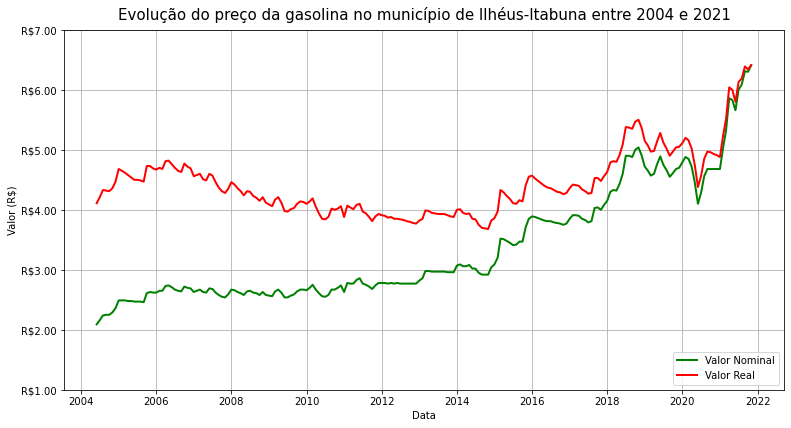

In [162]:
fig = plt.figure(figsize = (10,5))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(preco_nominal['data_coleta'],ipca_preco['preco_venda'], color = 'g', lw=2)
eixo.plot(preco_nominal['data_coleta'],ipca_preco['preco_real'], color = 'r', lw=2)
eixo.set_title('Evolução do preço da gasolina no município de Ilhéus-Itabuna entre 2004 e 2021', fontsize = 15, pad = 10)
eixo.set_ylabel('Valor (R$)', fontsize=10)
eixo.legend(['Valor Nominal','Valor Real'], loc='lower right', fontsize=10)
plt.yticks([1,2,3,4,5,6,7], ['R$1.00', 'R$2.00', 'R$3.00','R$4.00', 'R$5.00', 'R$6.00', 'R$7.00'],rotation=0, fontsize=10)  
eixo.set_xlabel('Data', fontsize=10)
eixo.grid(True)

Valores do preço da gasolina da região imediata de Ilhéus-Itabuna durante 2004 - 2021 (outubro), valores corrigidos com base nos preços 
de 2021 (out).

### Mapa


In [163]:
mapa = gpd.read_file('C:/Users/phill/Desktop/Trab/gasolina/BR_Municipios_2021.shp')

In [164]:
mapa.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [165]:
type(mapa)

geopandas.geodataframe.GeoDataFrame

In [166]:
ba = mapa[mapa['SIGLA'] == 'BA']
ba

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
1827,2900108,Abaíra,BA,538.677,"POLYGON ((-41.64722 -13.17888, -41.64679 -13.1..."
1828,2900207,Abaré,BA,1604.923,"POLYGON ((-39.35855 -8.54733, -39.35830 -8.547..."
1829,2900306,Acajutiba,BA,181.475,"POLYGON ((-38.04947 -11.58343, -38.04926 -11.5..."
1830,2900355,Adustina,BA,629.099,"POLYGON ((-37.99354 -10.43376, -37.99239 -10.4..."
1831,2900405,Água Fria,BA,742.775,"POLYGON ((-38.64762 -11.69026, -38.64682 -11.6..."
...,...,...,...,...,...
2239,2933307,Vitória da Conquista,BA,3254.186,"POLYGON ((-40.61462 -14.67092, -40.58399 -14.7..."
2240,2933406,Wagner,BA,522.370,"POLYGON ((-41.04050 -12.14869, -41.04045 -12.1..."
2241,2933455,Wanderley,BA,2920.579,"POLYGON ((-43.82126 -11.37674, -43.81968 -11.3..."
2242,2933505,Wenceslau Guimarães,BA,655.057,"POLYGON ((-39.72646 -13.50320, -39.72592 -13.5..."


<AxesSubplot:>

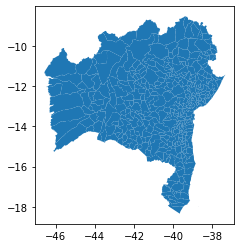

In [167]:
ba.plot()

In [168]:
ios = mapa[mapa['NM_MUN'] == 'Ilhéus']
ios

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
1990,2913606,Ilhéus,BA,1588.555,"MULTIPOLYGON (((-38.99811 -14.97857, -38.99797..."


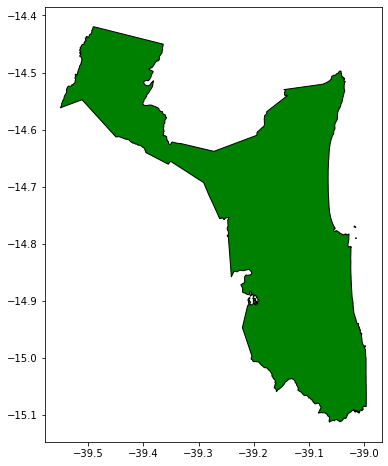

In [169]:
iosmap = ios.plot(figsize=(8, 8), facecolor = 'green', edgecolor = 'black')
plt.show()

In [170]:
ita = mapa[mapa['NM_MUN'] == 'Itabuna']
ita

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
2003,2914802,Itabuna,BA,401.028,"POLYGON ((-39.29187 -14.69349, -39.29173 -14.6..."


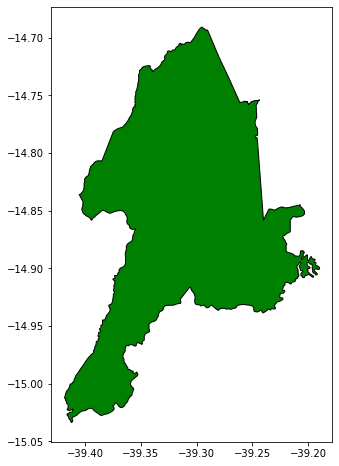

In [171]:
itamap = ita.plot(figsize=(8, 8), facecolor = 'green', edgecolor = 'black')
plt.show()

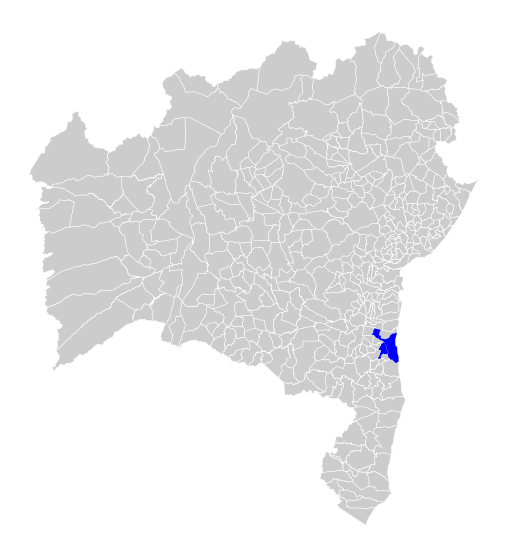

In [174]:
base = ba.plot(figsize=(15,10), edgecolor='white', linewidth=0.5, color='#CCCCCC')

mapa_exemplo = ios.plot(ax=base, color='blue')
mapa_exemplo = ita.plot(ax=base, color='blue')
mapa_exemplo.axis('off')

plt.show()